# Linear Regression Model

We are going to create a linear regression model to predict energy efficiency of buildings based on the features of the buildings.

The data is from UCI: https://archive.ics.uci.edu/dataset/242/energy+efficiency

The features are also explained at the link, but here is a brief breakdown:
1. X1: Relative Compactness
2. X2: Surface Area
3. X3: Wall Area
4. X4: Roof Area
5. X5: Overall Height
6. X6: Orientation
7. X7: Glazing Area
8. X8: Glazing Area Distribution
9. Y1: Heating Load
10. Y2: Cooling Load

We are trying to predict both Y1: Heating Load and Y2: Cooling Load.

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

These are all the libraries we are going to utilize

In [244]:
df = pd.read_excel(r'C:\Users\bryce\OneDrive\Desktop\Projects\linear_regression\Energy_Efficiency\ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [246]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Let's create a few data visualizations to get a better understanding of our data.

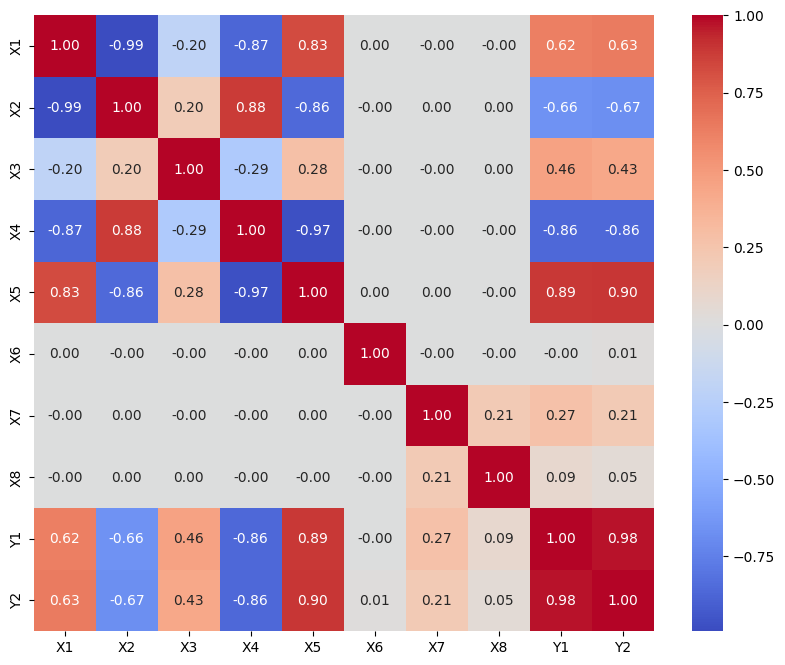

In [247]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

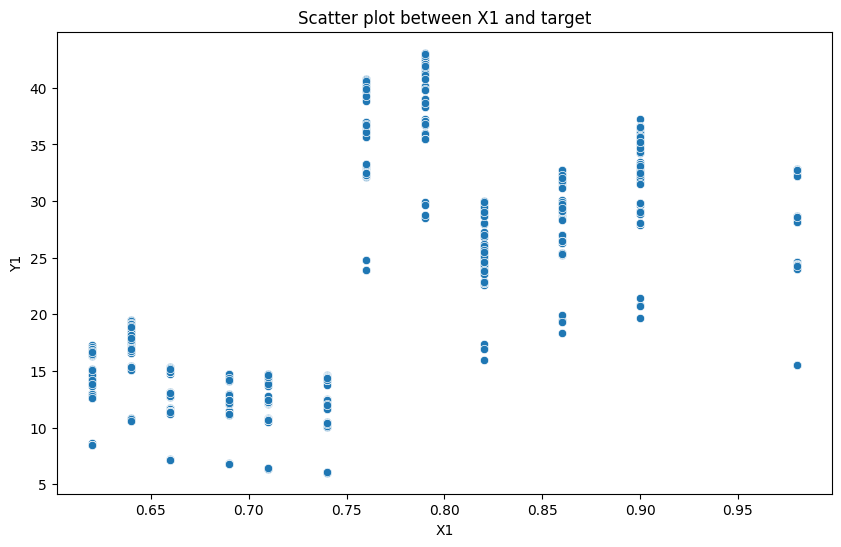

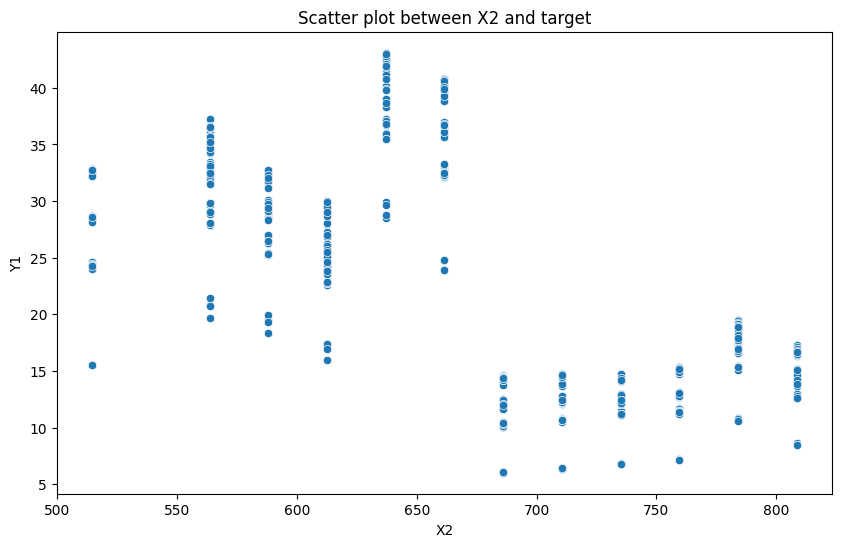

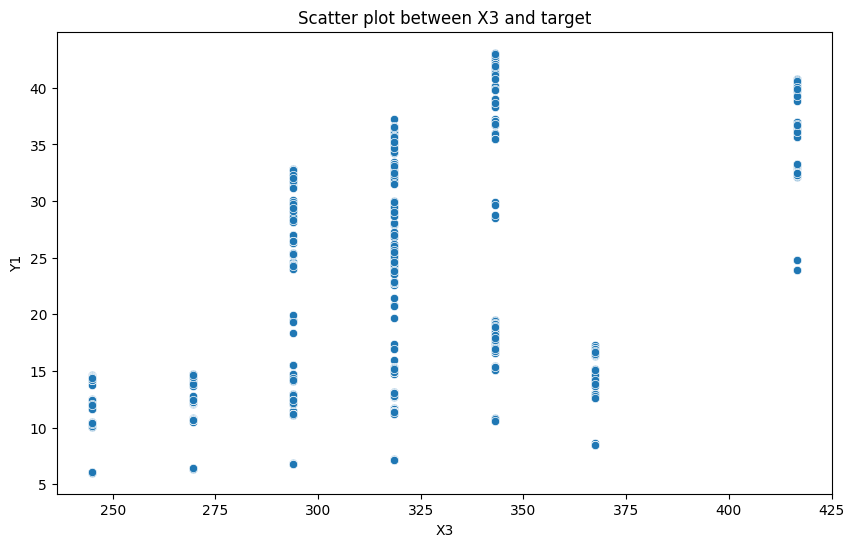

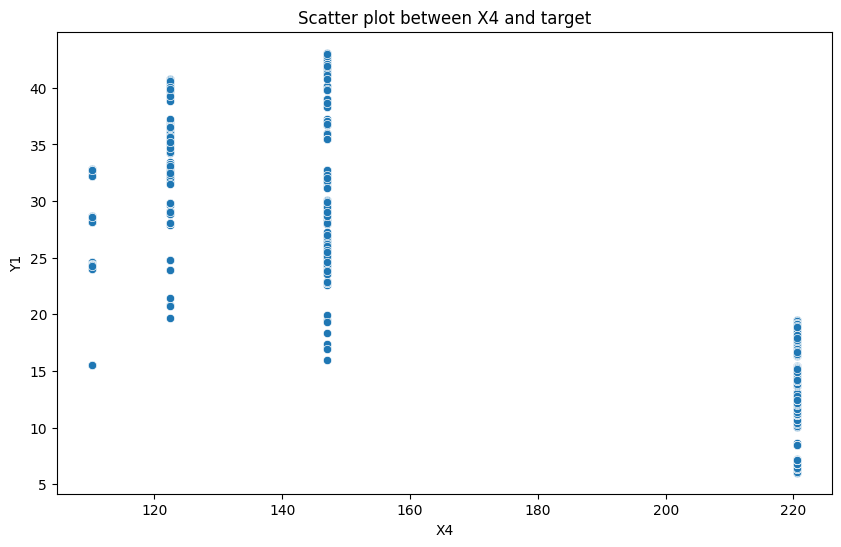

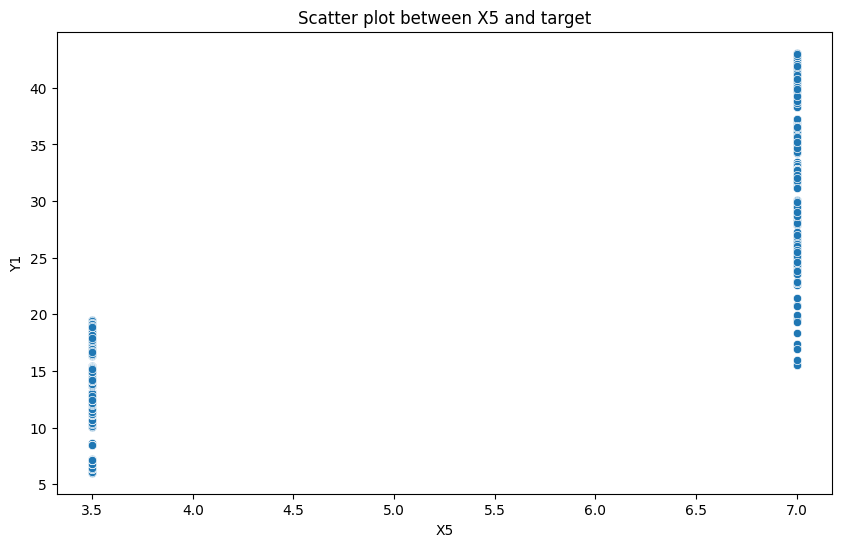

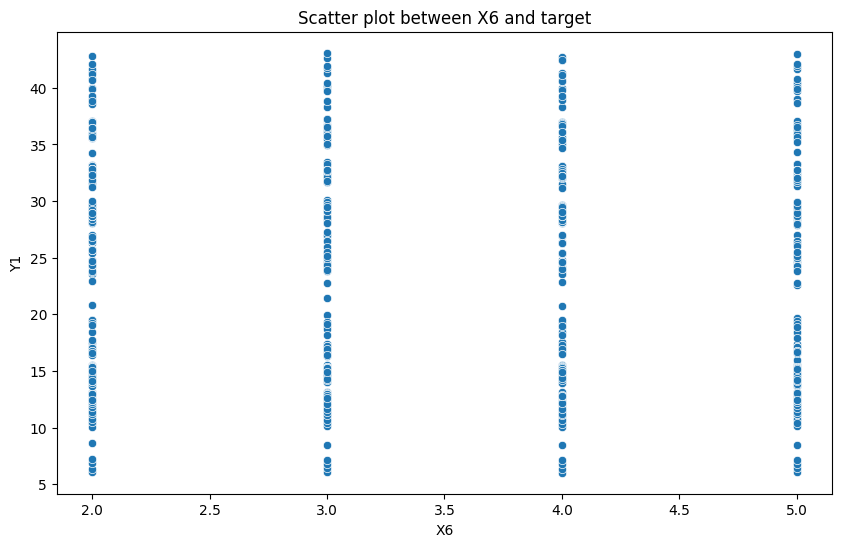

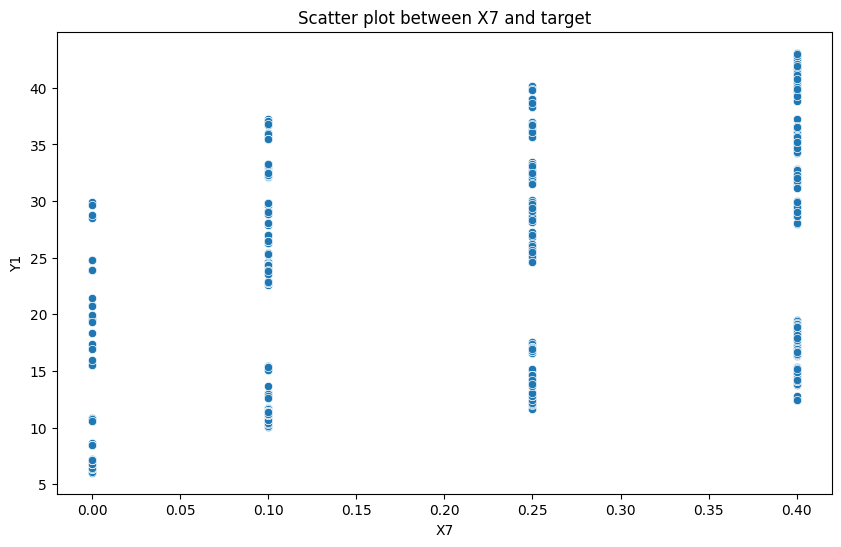

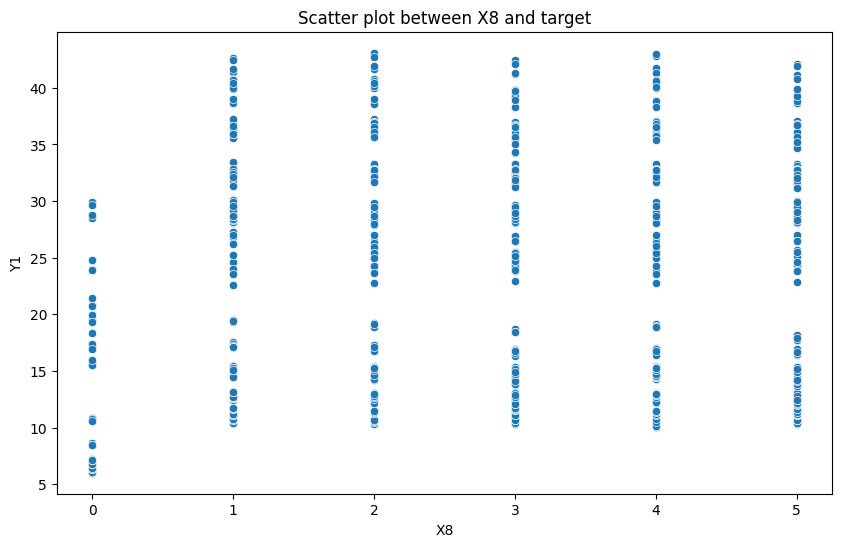

In [248]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

numerical_features = numerical_features.drop(['Y1','Y2'])

# Plot scatter plots
for feature in numerical_features:
    if feature != 'target':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['Y1'])
        plt.title(f'Scatter plot between {feature} and target')
        plt.show()

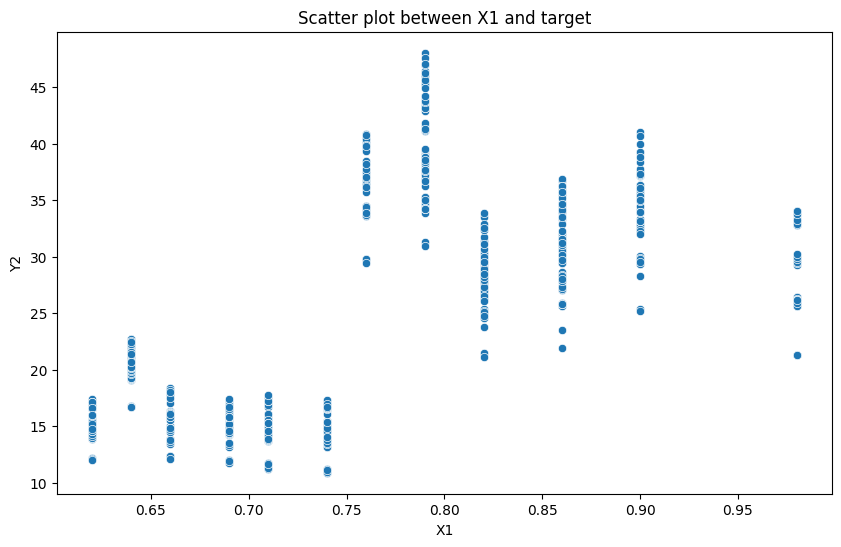

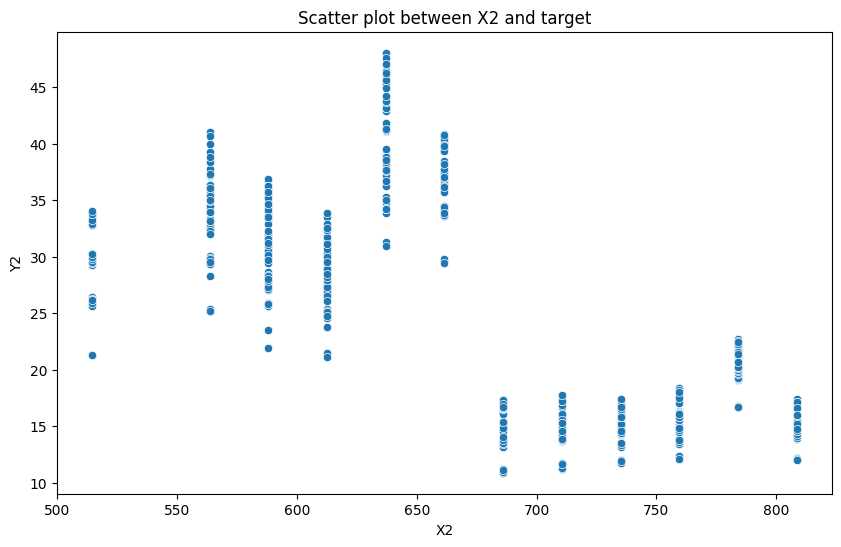

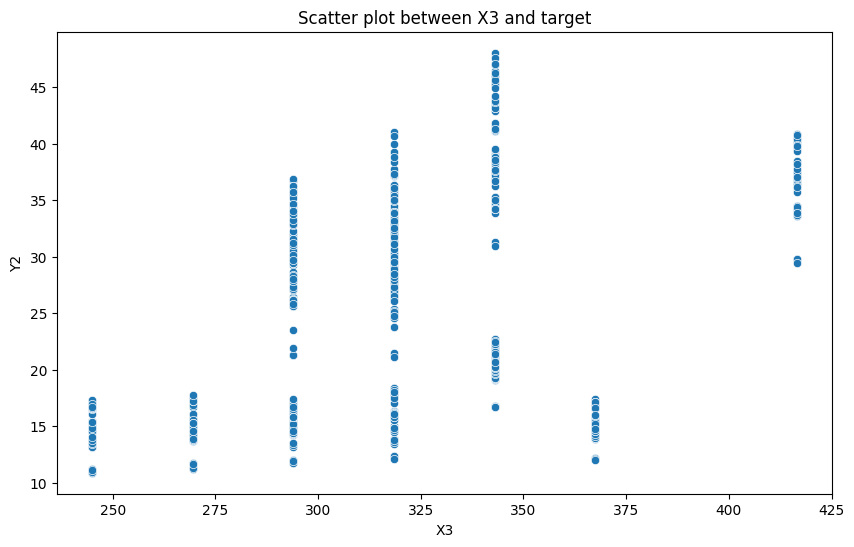

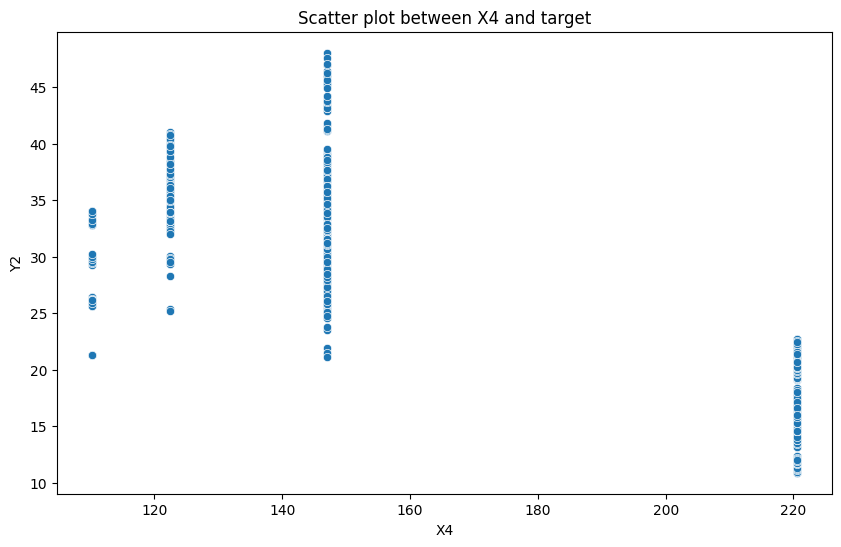

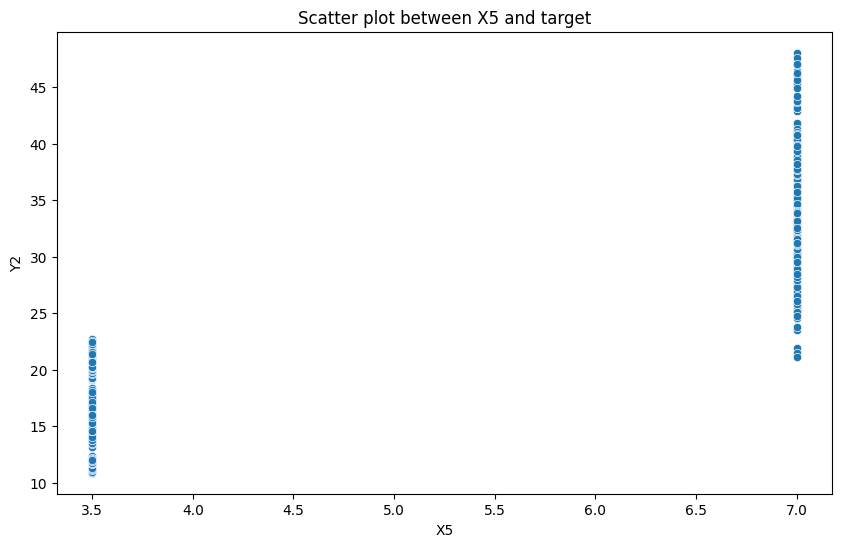

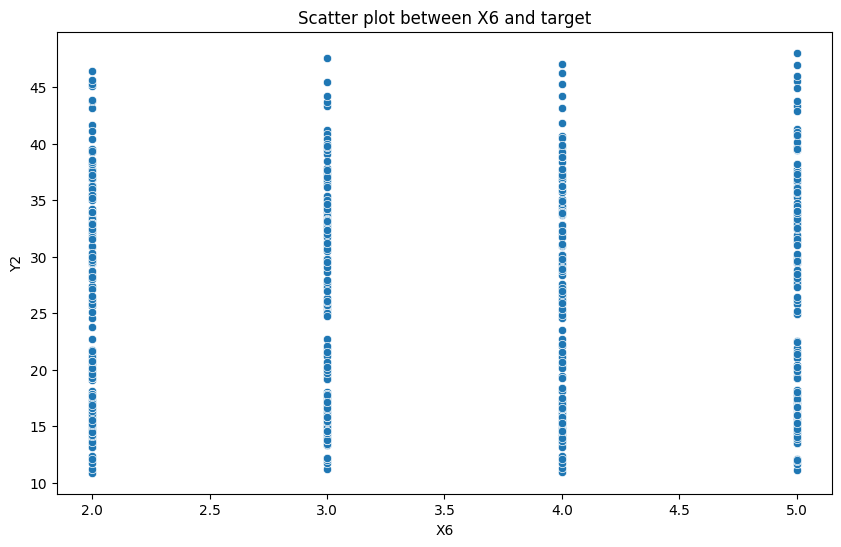

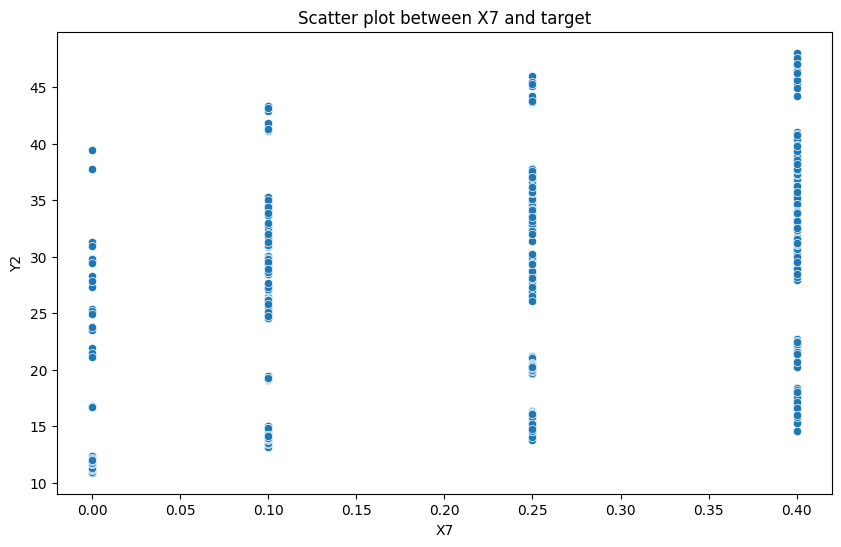

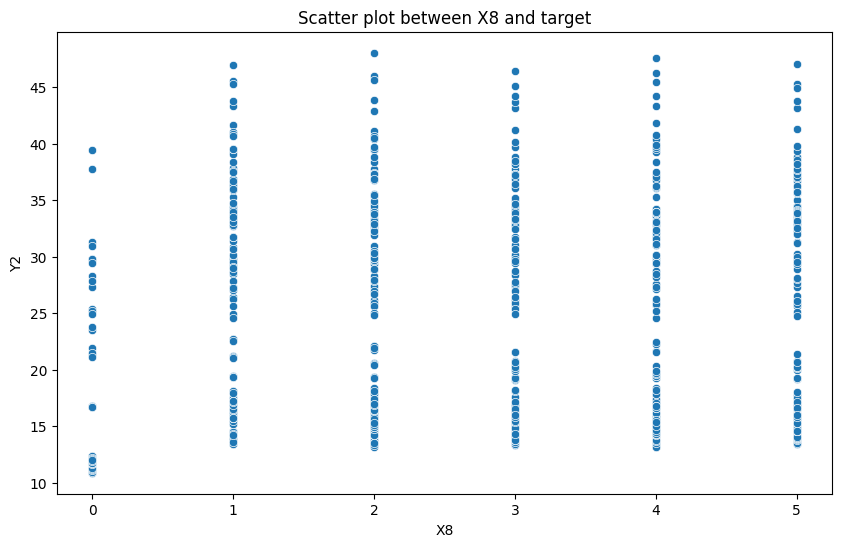

In [249]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

numerical_features = numerical_features.drop(['Y1','Y2'])

# Plot scatter plots
for feature in numerical_features:
    if feature != 'target':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['Y2'])
        plt.title(f'Scatter plot between {feature} and target')
        plt.show()

In [250]:
X = df.drop(columns=['Y1','Y2'])
y = df['Y1']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

In [252]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [253]:
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

9.990519613415703
0.8910427277450128


In [254]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores
print("Cross-validated MSE: ", mse_scores.mean())

Cross-validated MSE:  10.238724764894926


In [255]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=True)
print(feature_importance)

X1   -69.635415
X2    -0.062218
X4    -0.046589
X3     0.030959
X6     0.062821
X8     0.211157
X5     4.612243
X7    19.972379
dtype: float64


### Scale Features and Use Polynomial Features

In [256]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's start with degree 2 polynomial features

In [257]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [258]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [259]:
y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

0.7545617013346395
0.9917706998327591


Now let's do degree 3 polynomial features

In [260]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

0.30419252482895837
0.996682456065527


Now degree 4 polynomial features

In [261]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

0.3219289435560276
0.9964890215016752


In [262]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

0.25137843562070494
0.9972584500397579


To speed up the workflow process of optimizing our model, we can utilize the Pipeline module of sklearn to do the polynomial and scalar transformations.

In [263]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

# Define the hyperparameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Degrees of polynomial features to test
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

Best Hyperparameters:  {'poly_features__degree': 4}
Best Model Score:  -0.22560990853409382


In [264]:
# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.3219289435560493
R2 Score: 0.996489021501675


### Ridge Regression for Y1

In [265]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define the hyperparameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Degrees of polynomial features to test
    'ridge__alpha':[0.001, 0.01, 0.1, 0, 1, 10]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

Best Hyperparameters:  {'poly_features__degree': 4, 'ridge__alpha': 0.1}
Best Model Score:  -0.21619028346602726


In [266]:
# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.3270918234546954
R2 Score: 0.9964327147896616


### Lasso Regression for Y1

In [267]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lasso', Lasso())
])

# Define the hyperparameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Degrees of polynomial features to test
    'lasso__alpha':[0.001, 0.01, 0.1, 0, 1, 10]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

Best Hyperparameters:  {'lasso__alpha': 0.001, 'poly_features__degree': 4}
Best Model Score:  -0.21000881263595167


c:\Users\bryce\anaconda3\envs\EE_regr_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+02, tolerance: 6.387e+00
  model = cd_fast.enet_coordinate_descent(


In [268]:
# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.2915666400349459
R2 Score: 0.9968201548059523


## Y2
Now let's create a model to predict Y2

In [269]:
X = df.drop(columns=['Y1','Y2'])
y = df['Y2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

10.202642229936066
0.8724179248980488


In [270]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores
print("Cross-validated MSE: ", mse_scores.mean())

Cross-validated MSE:  10.854197003563128


In [271]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

# Define the hyperparameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Degrees of polynomial features to test
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

Best Hyperparameters:  {'poly_features__degree': 4}
Best Model Score:  -2.6946952202386294


In [272]:
# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 3.009344193621801
R2 Score: 0.9623687307399895


In [273]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge(random_state=302))
])

# Define the hyperparameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Degrees of polynomial features to test
    'ridge__alpha':[0.001, 0.01, 0.1, 0, 1, 10]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

Best Hyperparameters:  {'poly_features__degree': 4, 'ridge__alpha': 1}
Best Model Score:  -2.312483055844502


In [274]:
# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2.4452990887332087
R2 Score: 0.9694220060887652


In [275]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lasso', Lasso())
])

# Define the hyperparameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Degrees of polynomial features to test
    'lasso__alpha':[0.001, 0.01, 0.1, 0, 1, 10]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

Best Hyperparameters:  {'lasso__alpha': 0.01, 'poly_features__degree': 5}
Best Model Score:  -2.0149721770093683


c:\Users\bryce\anaconda3\envs\EE_regr_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.633e+02, tolerance: 5.702e+00
  model = cd_fast.enet_coordinate_descent(


In [276]:
# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.725374353714341
R2 Score: 0.9784245261753197


## Let's Automate Model Evaluation and Comparisons

In [277]:
models = [
    ("Linear Regression",LinearRegression()),
    ("Ridge",Ridge()),
    ("Lasso",Lasso())
]

In [278]:
param_grids = {
    "Linear Regression": {
        'poly_features__degree': [1, 2, 3, 4, 5]
    },
    "Ridge": {
        'poly_features__degree': [1, 2, 3, 4, 5],
        'ridge__alpha':[0.001, 0.01, 0.1, 0, 1, 10]
    },
    "Lasso": {
        'poly_features__degree': [1, 2, 3, 4, 5],
        'lasso__alpha':[0.001, 0.01, 0.1, 0, 1, 10]
    }
}

# Best Model - Y1

In [285]:
X = df.drop(columns=['Y1','Y2'])
y = df['Y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

In [286]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Lasso(alpha=0.001)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

0.2915666400349459
0.9968201548059523


c:\Users\bryce\anaconda3\envs\EE_regr_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+02, tolerance: 6.387e+00
  model = cd_fast.enet_coordinate_descent(


# Best Model - Y2

In [287]:
X = df.drop(columns=['Y1','Y2'])
y = df['Y2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

In [288]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Lasso(alpha=0.01, random_state=302)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

1.7253743537143416
0.9784245261753197


c:\Users\bryce\anaconda3\envs\EE_regr_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.633e+02, tolerance: 5.702e+00
  model = cd_fast.enet_coordinate_descent(
